# Data type constraints


In [3]:
import pandas as pd
import numpy as np
ride_sharing= pd.read_csv('ride_sharing_new.csv')

In [3]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing.user_type.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

In [5]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


In [6]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing.duration_trim.astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing.duration_time.mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


# Data range constraints


In [7]:
# Convert tire_sizes to integer
ride_sharing['duration_time1'] = ride_sharing['duration_time'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['duration_time1'] > 27, 'duration_time1'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['duration_time1'] = ride_sharing['duration_time1'].astype('category')

# Print tire size description
print(ride_sharing['duration_time1'].describe())

count     25760
unique       27
top           7
freq       2322
Name: duration_time1, dtype: int64


In [8]:
import datetime as dt

In [9]:
ride_sharing['user_birth']= pd.to_datetime(ride_sharing.user_birth_year)
today=dt.date.today()
ride_sharing.loc[ride_sharing.user_birth == today, 'user_birth'] = today
print(ride_sharing['user_birth'].max())

1970-01-01 00:00:00.000002001


In [10]:
# if you want to drop 
ride_sharing.drop(ride_sharing[ride_sharing.duration_time >200].index, inplace=True)
# you can make new data frame
ride_sharing1= ride_sharing[ride_sharing.duration_time > 200]

# Uniqueness constraints


In [11]:
# find duplicates
duplicates= ride_sharing.duplicated(subset='user_type', keep=False)

# Sort your duplicated rides
duplicated_rides= ride_sharing[duplicates].sort_values('user_type')

# Print relevant columns
print(duplicated_rides[['user_type','duration','user_birth_year']])

       user_type    duration  user_birth_year
12794          1   9 minutes             1980
15460          1  12 minutes             1986
5227           1   8 minutes             1987
20517          1   6 minutes             1995
20518          1  16 minutes             1975
...          ...         ...              ...
18430          3   7 minutes             1989
18429          3  11 minutes             1985
7300           3  14 minutes             1989
7275           3   9 minutes             1978
25759          3  29 minutes             1990

[25720 rows x 3 columns]


In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('user_type').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'user_type', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

# Membership constraints

In [13]:
airlines= pd.read_csv('airlines_final.csv')
airlines.head(2)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied


In [14]:
categories= airlines[['cleanliness', 'safety', 'satisfaction']]
print(categories)
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines.safety.unique(), "\n")
print('Satisfaction: ', airlines.satisfaction.unique(), '\n')

         cleanliness         safety        satisfaction
0              Clean        Neutral      Very satisfied
1              Clean      Very safe      Very satisfied
2            Average  Somewhat safe             Neutral
3              Clean      Very safe  Somewhat satsified
4     Somewhat clean      Very safe  Somewhat satsified
...              ...            ...                 ...
2472  Somewhat clean        Neutral  Somewhat satsified
2473           Clean      Very safe      Very satisfied
2474           Clean      Very safe      Very satisfied
2475           Clean  Somewhat safe      Very satisfied
2476           Clean      Very safe  Somewhat satsified

[2477 rows x 3 columns]
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [15]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [16]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820   Thursday          DELTA        LOS ANGELES   
3              3  1157    Tuesday      SOUTHWEST        LOS ANGELES   
4              4  2992  Wednesday       AMERICAN              MIAMI   
...          ...   ...        ...            ...                ...   
2472        2804  1475    Tuesday         ALASKA       NEW YORK-JFK   
2473        2805  2222   Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684     Friday         UNITED            ORLANDO   
2475        2807  2549    Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162   Saturday  CHINA EAST

# Categorical variable 

In [17]:
# Print unique values of both columns
print(airlines.dest_region.unique())
print(airlines.dest_size.unique())


['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [18]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region']= airlines.dest_region.str.lower()
airlines['dest_region']= airlines.dest_region.replace({'eur': 'europe'})

# Remove white spaces from `destdest_size
airlines['dest_size']= airlines.dest_size.str.strip()

#print new unique values
print(airlines.dest_region.unique())
print(airlines.dest_size.unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [19]:
airlines.head(1)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied


In [20]:
# we want to change wait_min to short medium and long based on how long the time is 
label_range= [0, 60, 180, np.inf]
label_name=['short', 'medium', 'long']
airlines['wait_type']= pd.cut(airlines.wait_min, bins=label_range, labels= label_name)
airlines.wait_type.value_counts()

medium    1711
long       685
short       81
Name: wait_type, dtype: int64

In [21]:
# Now we want to a column day_week change day to show weekday or weekend
map= {'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday', 'Friday': 'weekday', 'Saturday': 'weekend', 'Sunday': 'weekend'}
airlines['day_week']= airlines.day.replace(map)
airlines.day_week.value_counts()

weekday    2000
weekend     477
Name: day_week, dtype: int64

# Cleaning Text Data

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.", "")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.", "")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss", "")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.", "")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines.survey_response.str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

# Uniformity


In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [22]:
banking= pd.read_csv('banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
# ANOTHER example chaning temperature for F to Celsius
#get all the F temp in the dataframe
temp= df.loc[df.temp > 40, 'temp']

#convert to celsius
temp_c= (temp-32) * (5/9)

# change it in the DF
df.loc[df.temp >40, 'temp']= temp_c

In [23]:
print(banking.account_opened.head())

# Convert account_opened to datetime
banking['account_opened']= pd.to_datetime(banking.account_opened, infer_datetime_format=True, errors= 'coerce')

# Get year of account opened
banking['year']= banking.account_opened.dt.strftime('%Y')
print(banking.year)

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: year, Length: 100, dtype: object


# Cross field validation


In [24]:
# Store in a field
fund_amount= ['fund_A', 'fund_B','fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_amount].sum(axis=1) == banking.inv_amount

# Store consistent and inconsistent data
consistent_inv= banking[inv_equ]
inconsistent_inv= banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
import datetime as dt
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking.birth_date.dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

# Completeness

In [26]:
import missingno as msno
import matplotlib.pyplot as plt

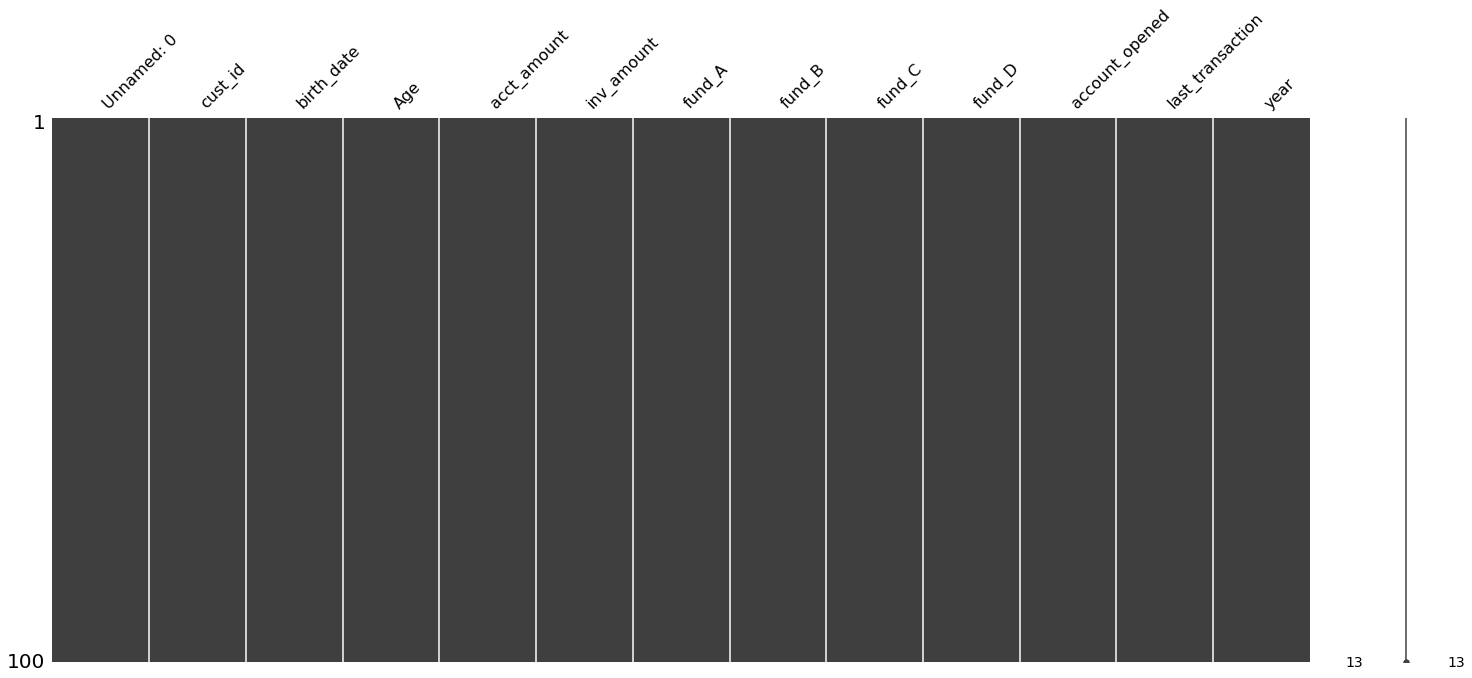

In [27]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

In [28]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
year                0
dtype: int64


# Comparing strings


In [4]:
restaurants= pd.read_csv('restaurants_L2.csv')
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [ ]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

In [ ]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
restaurants['cuisine_type'].unique()

# Generating pairs

In [ ]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

In [ ]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new) 
print(potential_matches)

# Linking DataFrames


In [ ]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)